## Summary

This analysis uses a dataset that records the inflow of immigrants into Canada from all over the world from 1980 to 2013 and is used to identify patterns and trends. A JSON file is used at the end of the analysis in conjuction with Folium to produce a choropleth map.

## Importing Libraries and Data

In [1239]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])
from PIL import Image
import matplotlib.patches as mpatches
import seaborn as sns
import folium
import json

df = pd.read_excel('../input/canadian-immigration-from-1980-to-2013/Canada.xlsx', sheet_name='Canada by Citizenship (2)')
world_geo = json.load(open('../input/world-geo/world_countries.json'))

## Getting Familiar with the Dataset
We'll be analyzing a dataset that contains annual data on the flows of international immigrants into Canada from 1980 to 2013. First we'll begin by getting ourselves familiar with the dataset which will help us get an idea of where we need to begin in our analysis.

In [1240]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [1241]:
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484


There is a row at the bottom of the dataframe with an 'Unknown' country. This looks like it could be a 'Total' row, but we will remove it for reassurance and add a 'Total' column later.

In [1242]:
# dropping df index value 195 'Unknown'
df = df.drop(195)

In [1243]:
# checking the end of the df
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


Index value 195 has successfully been removed from the dataframe. Next we'll want to get a basic summary of the dataframe.

In [1244]:
# grabbing some info about the dataset
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 67.0+ KB


From this we can see we have a dataframe with 195 rows and 43 columns. The columns incldue six object datatypes and six int64 datatypes.

In [1245]:
# taking a better look at the attribute datatypes
df.dtypes

Type        object
Coverage    object
OdName      object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

Now we will convert the index and columns to lists.

In [1246]:
# converting the columns to a list
df.columns.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [1247]:
# converting the index to a list
df.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Now we'll check the dimensions of the dataframe to make sure everything is looking good.

In [1248]:
# checking the dimensions of the dataframe
df.shape

(195, 43)

## Cleaning the Dataset
Along with the row containing 'Unknown' that was dropped at the very beginning of the analysis, we will also be dropping a few unnecessary columns. We'll do this using the same .drop() method.

In [1249]:
# dropping columns that aren't needed for this data analysis
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Next we'll want to rename the columns so they make sense when we're using the data.

In [1250]:
# renaming the columns
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Now we'll add the 'Total' column mentioned earlier. We'll sum up the total immigrants by country from 1980 - 2013.

In [1251]:
# adding a 'Total' column to the dataframe
df['Total'] = df.sum(axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [1252]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Next we'll check for any NaN values inside the dataframe.

In [1253]:
# checking for NaN values
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

No NaN values inside the dataframe. Next we'll set the index to reflect the countries themselves for easier navigation.

In [1254]:
# setting 'Country' as the index
df.set_index('Country', inplace=True)

In [1255]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


We'll go ahead and remove the name of the index so the dataframe looks cleaner.

In [1256]:
# removing the name of the index
df.index.name = None
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


We'll also change the column names that are integers to strings because it might cause some confusion when calling a positional index. This should be commented out when plotting to refer back to integers.

In [1257]:
#df = df.applymap(str)

In [1258]:
# making a list of years to help with plotting later on
years = list(map(int, range(1980, 2014)))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

## Exploring the Dataset
#### Haitian Immigration Post-Earthquake
In 2010 Haiti suffered a catastrophic 7.0 magnitude earthquake. The quake was devastating to the small Caribbean country with nearly three million people affected by the disaster. As part of Canada's humanitarian effort, its government accepted thousands of refugees to restart their lives in Canada. We should be able to see this reflected in our data.

In [1259]:
# isolating the data
haiti = df.loc["Haiti", years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

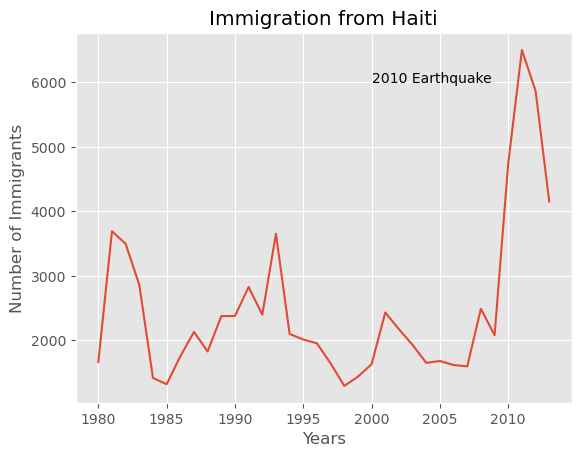

In [1260]:
# plotting 'Haiti Immigration to Canada from 1980 - 2013'
haiti.index = haiti.index.map(int)
haiti.plot(kind = 'line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.text(2000, 6000, '2010 Earthquake')

plt.show()

We can clearly see how the number of immigrants from Haiti increased from 2010 following Canada's efforts to accept refugees from Haiti after the devastating earthquake.

#### Immigrants from India and China from 1980 to 2013

In [1261]:
# isolating the data for China and India
df_CI = df.loc[['India', 'China'], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Next we'll need to transpose the dataframe so the index is 'years' and the columns are the two countries.

In [1262]:
# transposing 'df_CI'
df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


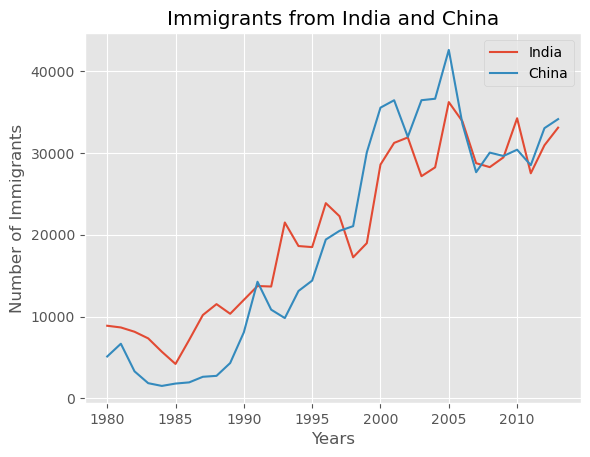

In [1263]:
# plotting China vs India immigration trends
df_CI.plot(kind = 'line')

plt.title('Immigrants from India and China')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

From the plot above, we can see that India and Chinia had very similar immigration trends throughout the years. Now let's see which countries had the highest immigration to Canada over the years.

#### Top Five Countries with Highest Immigration to Canada

In [1264]:
# sorting by 'Total' and transposing
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df.head(5)
df_top5 = df_top5[years].transpose()

print(df_top5)

      India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      
1985   4211   1816                                               9564      
1986   7150   1960                                               9470      
1987  10189   2643                                              21337      
1988  11522   2758                                              27359      
1989  10343   4323                                              23795      
1990  12041   8076                                              31668      
1991  13734  14255                                              23380      
1992  13673 

We can see now that the top five countries with the highest immigration to Canada from 1980 to 2013 were India, China, United Kingdom, Philippines, and Pakistan. Now we'll plot them.

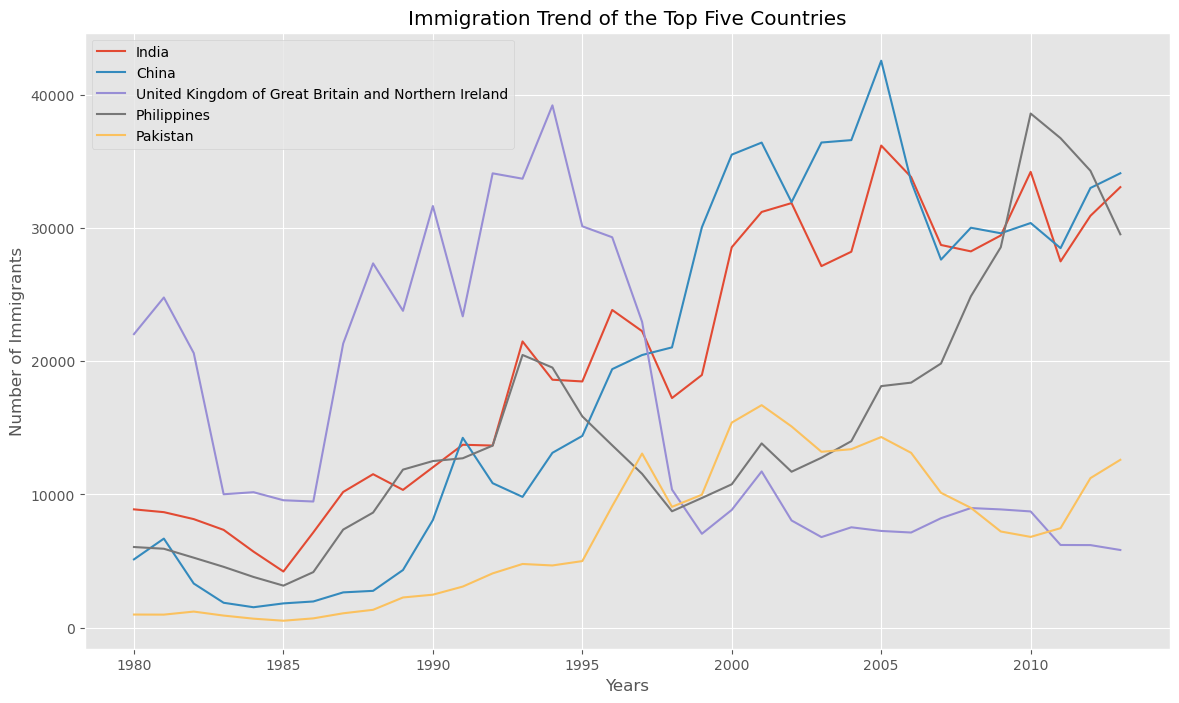

In [1265]:
# plotting the top five countries in a line plot
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'line', figsize = (14,8))

plt.title('Immigration Trend of the Top Five Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

Now we'll visualize the same data in an area plot.

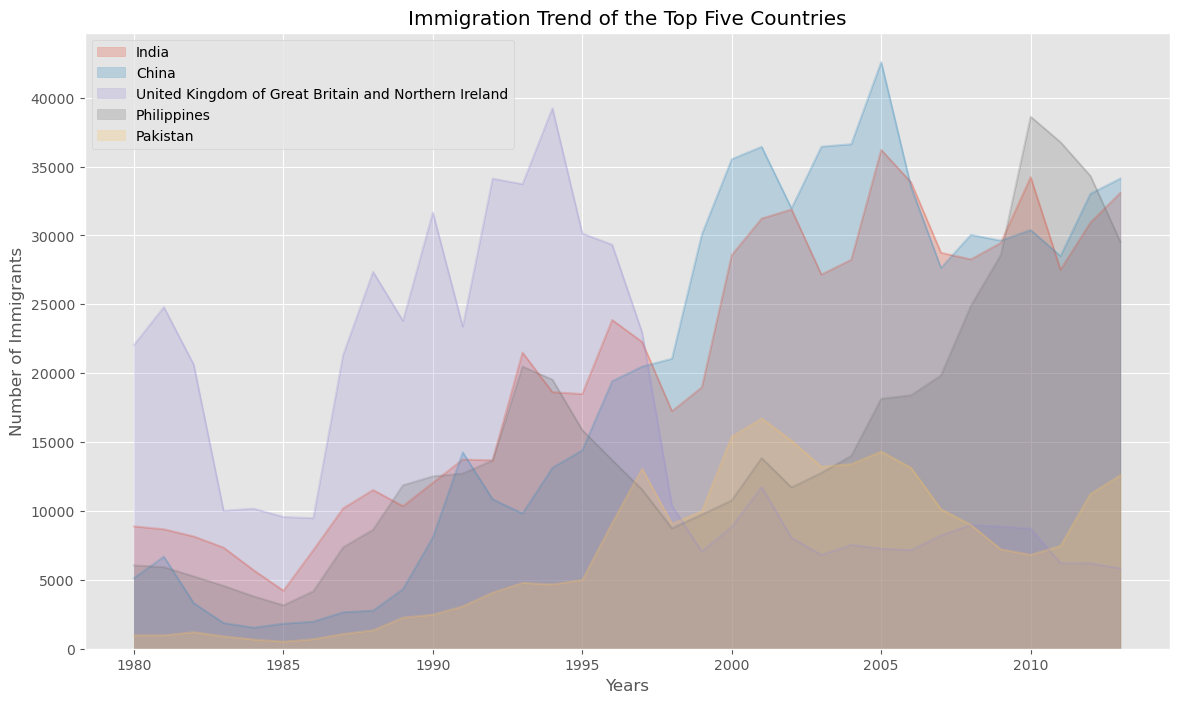

In [1266]:
# plotting the top five countries in an area plot
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'area', alpha = 0.25, stacked = False, figsize = (14,8))

plt.title('Immigration Trend of the Top Five Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

Next we'll take a look at the five countries that contributed the least to immigration to Canada from 1980 to 2013.

#### Countries with the Least Immigration to Canada

In [1267]:
# isolating and transposing the data
df_least5 = df.tail(5)

df_least5 = df_least5[years].transpose()

print(df_least5)


      San Marino  New Caledonia  Marshall Islands  Western Sahara  Palau
1980           1              0                 0               0      0
1981           0              0                 0               0      0
1982           0              0                 0               0      0
1983           0              0                 0               0      0
1984           0              0                 0               0      0
1985           0              0                 0               0      0
1986           1              0                 0               0      0
1987           0              0                 0               0      0
1988           0              0                 0               0      0
1989           0              0                 0               0      0
1990           1              0                 0               0      0
1991           0              0                 0               1      0
1992           0              0                 0  

We can see now that the countries with the least immigration to Canada from 1980 to 2013 was San Marino, New Caledonia, Marshall Islands, Western Sahara, and Palau. Let's plot them below.

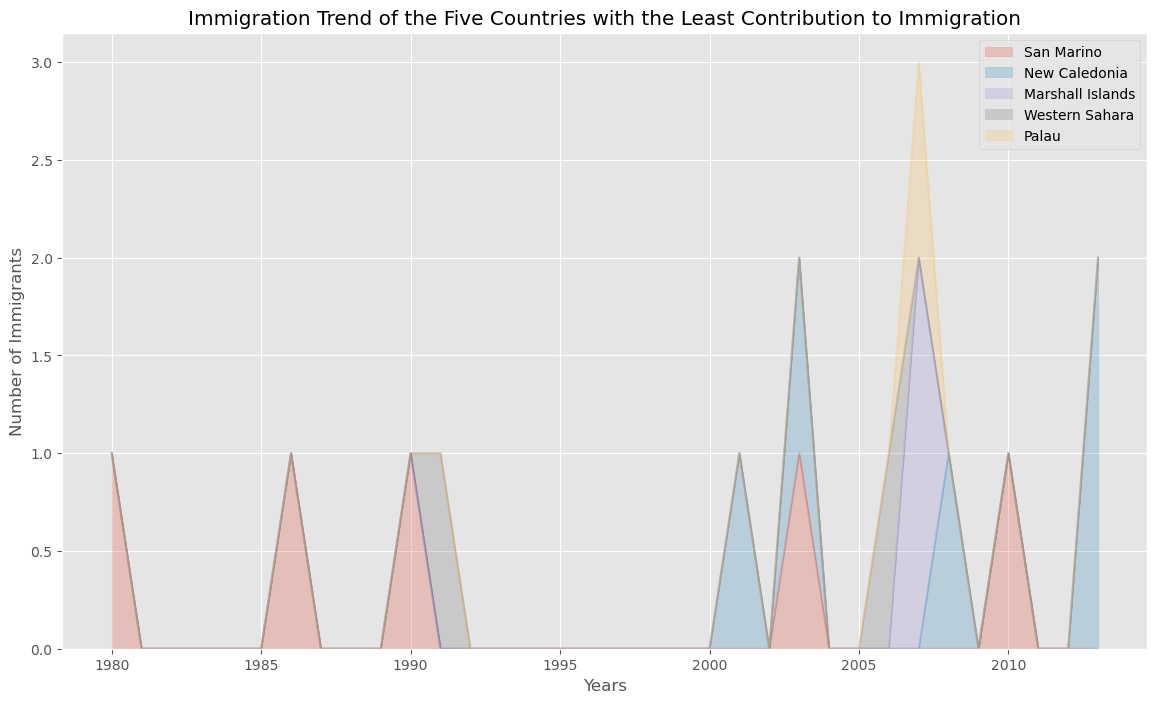

In [1268]:
# plotting the top five countries in an area plot
df_least5.index = df_least5.index.map(int)
df_least5.plot(kind = 'area', alpha = 0.25, stacked = True, figsize = (14,8))

plt.title('Immigration Trend of the Five Countries with the Least Contribution to Immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

#### Frequency Distribution of New Immigrants in 2013

In [1269]:
# isolating only the 2013 data
df[2013].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [1270]:
# creating bins
count, bin_edges = np.histogram(df[2013])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


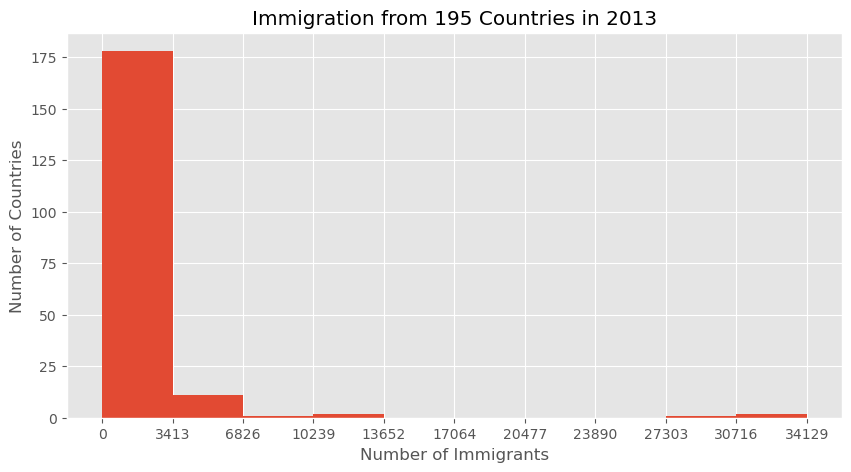

In [1271]:
# plotting the data
df[2013].plot(kind = 'hist', xticks = bin_edges, figsize = (10,5))

plt.title('Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

#### Immigration Distribution for Denmark, Norway, and Sweden from 1980 to 2013

In [1272]:
# isolating the dataset
df.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [1273]:
# creating the histogram
df_dns = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_dns.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


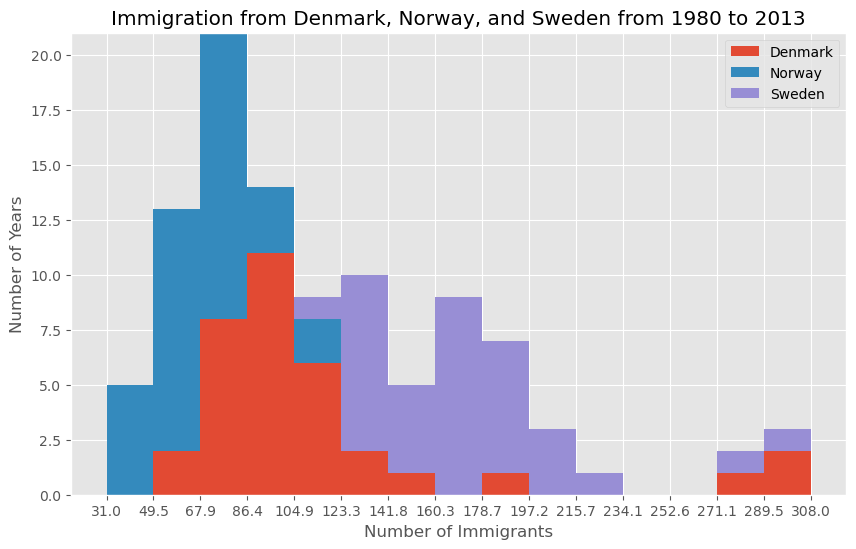

In [1274]:
# plotting the histogram
count, bin_edges = np.histogram(df_dns, 15)

df_dns.plot(kind='hist', figsize=(10,6), bins=15, xticks=bin_edges, stacked=True)

plt.title('Immigration from Denmark, Norway, and Sweden from 1980 to 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show()

#### Immigration Distribution for Greece, Albania, and Bulgaria from 1980 to 2013

In [1275]:
# isolating the dataset
df.loc[['Greece', 'Albania', 'Bulgaria'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512


In [1276]:
# transposing the dataset
df_gab = df.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
df_gab.head()

,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


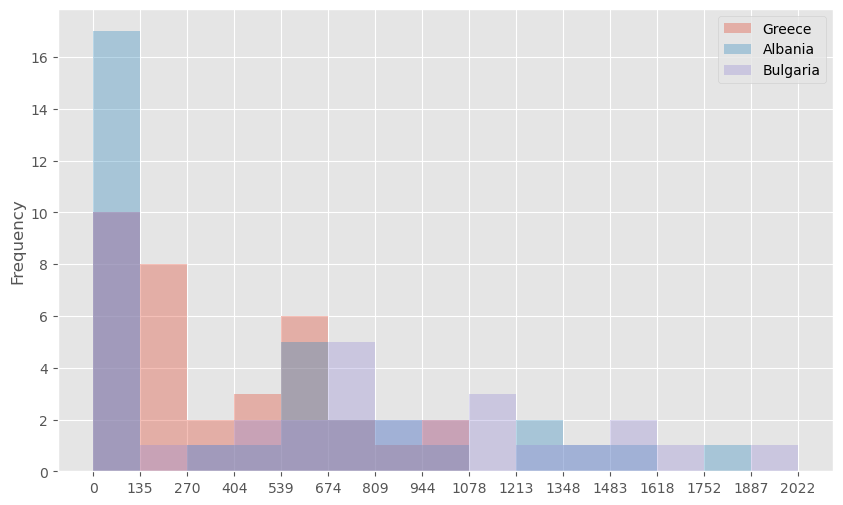

In [1277]:
# creating the histogram
count, bin_edges = np.histogram(df_gab, 15)

df_gab.plot(kind='hist', figsize=(10,6), bins=15, xticks=bin_edges, alpha=0.35)
plt.show()

#### The Effect of The Icelandic Financial Crisis on Immigration
From 2008 - 2011, Iceland's banking system collapsed which led to severe economic depresssion and political unrest. This major economic event also led to many Icelandic's immigrating to other countries. Let's take a look at how many immigrants Canada accepted during this time.

In [1278]:
# isolating and transposing the dataset
df_iceland = df.loc[['Iceland'], years]
print(df_iceland.head())

df_iceland = df_iceland.transpose()

         1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Iceland    17    33    10     9    13     6    11    11     7     3  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Iceland    23    10     2    15    13    15    30    38    42    72  

[1 rows x 34 columns]


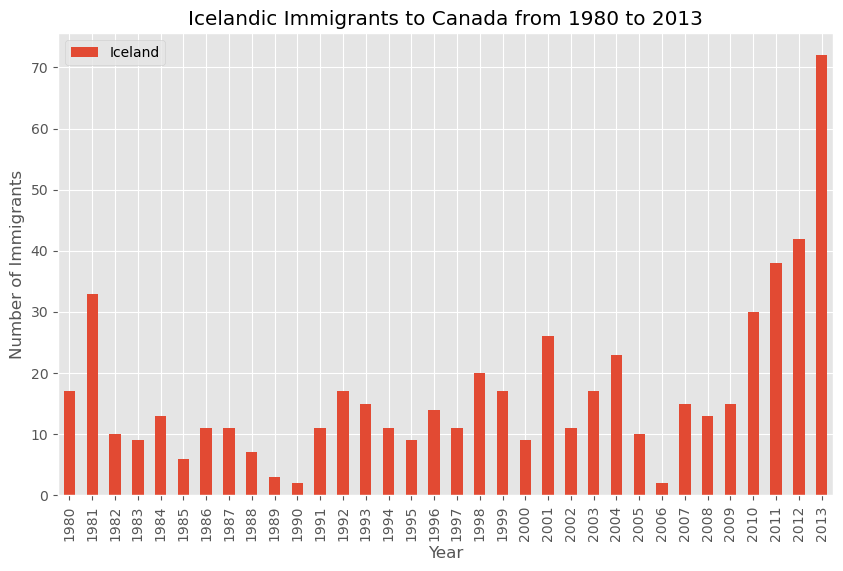

In [1279]:
# plotting the dataset
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Observing the plot above we can clearly see the impact of the financial crisis. The number of immigrants to Canada started increasing rapidly after 2008. To better highlight this increase, we'll annotate the graph below.

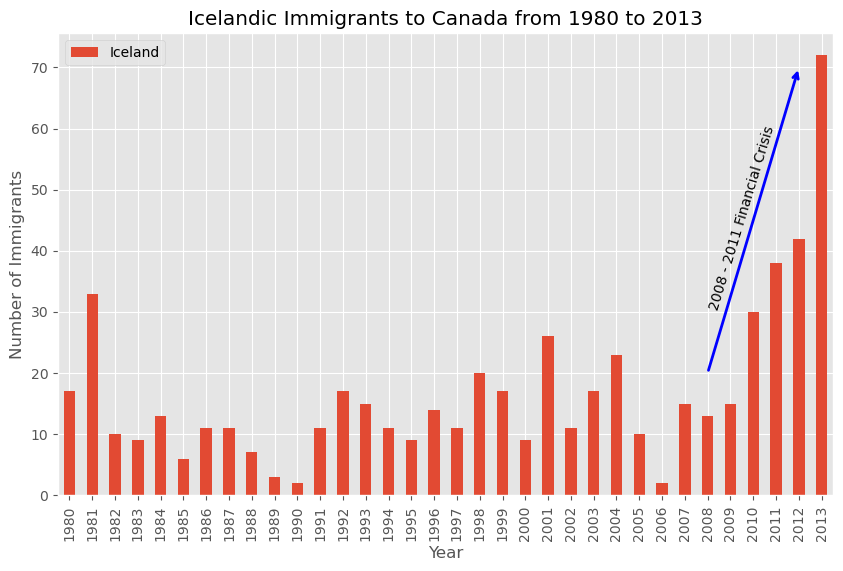

In [1280]:
# annotating the dataset
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.annotate('',
             xy=(32,70),
             xytext=(28,20),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.annotate('2008 - 2011 Financial Crisis',
             xy=(28,30),
             rotation=73,
             va='bottom',
             ha='left')

plt.show()

Now that we have annotated the bar chart, the effect of the 2008 - 2011 Icelandic Financial Crisis on immigration is much more apparent.

In [1281]:
# sorting the values of the top 15 'Total' values and assigning it to an object
df.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df['Total'].tail(15)
df_top15

Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

We have observed an increase in immigration to Canada from Iceland from 2008 - 2013, but what are the top 15 countries contributing to Canada's immigration in total from 1980 to 2013?

#### Top 15 Countries Contributing to Immigration

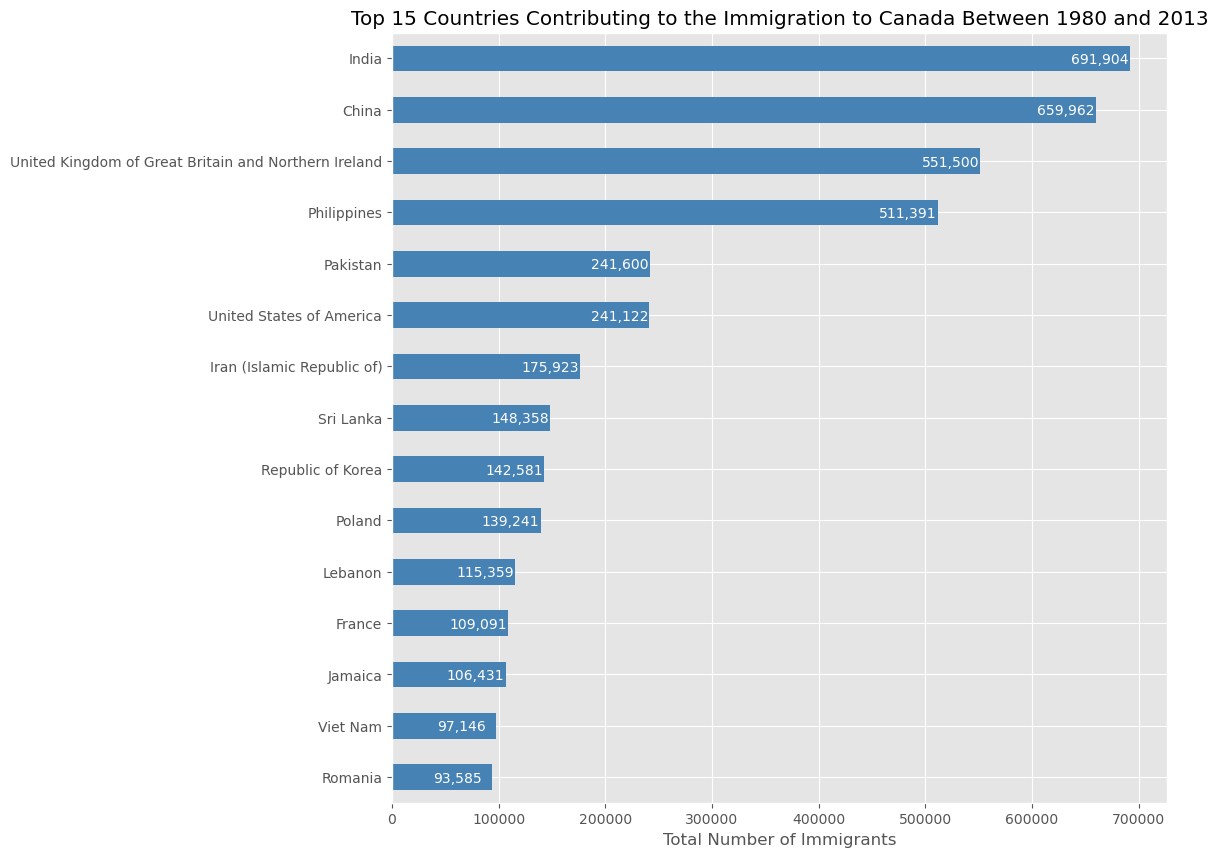

In [1282]:
# plotting a horizontal bar graph
df_top15.plot(kind='barh', color='steelblue', figsize=(10,10))

plt.title('Top 15 Countries Contributing to the Immigration to Canada Between 1980 and 2013')
plt.xlabel('Total Number of Immigrants')

for index, value in enumerate(df_top15):
    label = format(int(value), ',')
    
    plt.annotate(label, xy=(value - 55000, index - 0.1), color='white')

plt.show()

Next we'll look at the proportion of new immigrants grouped by continents for the entire time period from 1980 to 2013. We'll do this by creating a simple pie chart. To do this we'll have to split the data into different groups based on certain criteria then apply specific functions to each group independently and combine the results.

#### Immigration Percentages by Continent

In [1283]:
# grouping countries by continents and applying the sum function
df_continents = df.groupby('Continent', axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


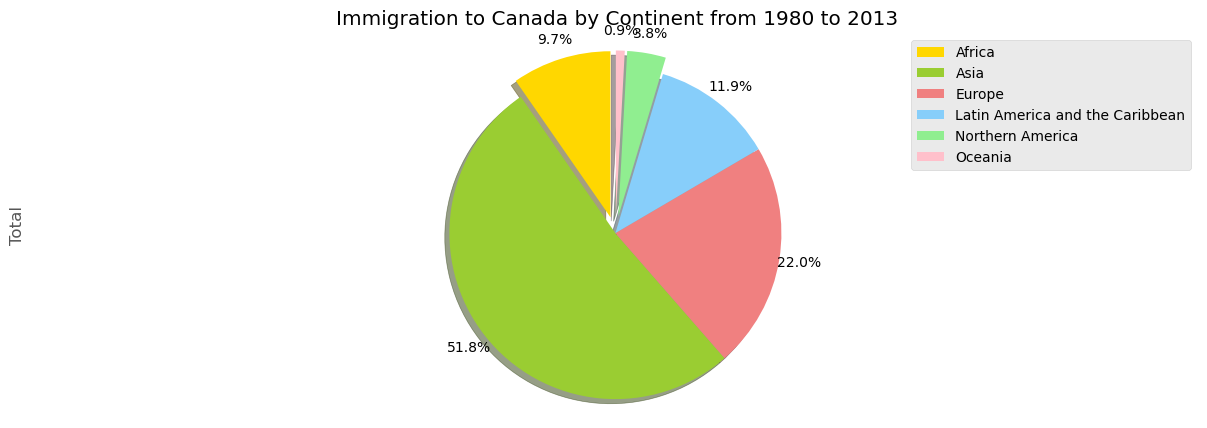

In [1284]:
# passing the 'Total' data of 'df_continents' into a pie plot
colors_list= ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list= [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie', figsize=(15,5), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)


plt.title('Immigration to Canada by Continent from 1980 to 2013')
plt.axis('equal')
plt.legend(labels=df_continents.index, loc=0)

plt.show()

By looking at the pie chart above we can clearly see that, from 1980 to 2013, Canada received most of its immigration population from Northern America followed by Europe and Latin America and the Caribbean respectively. Next we'll take a look create a box plot to look at the distribution of Japanese immigrants during this time.

#### Immigration Distribution of Japan

In [1285]:
# isolating and transposing the data
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


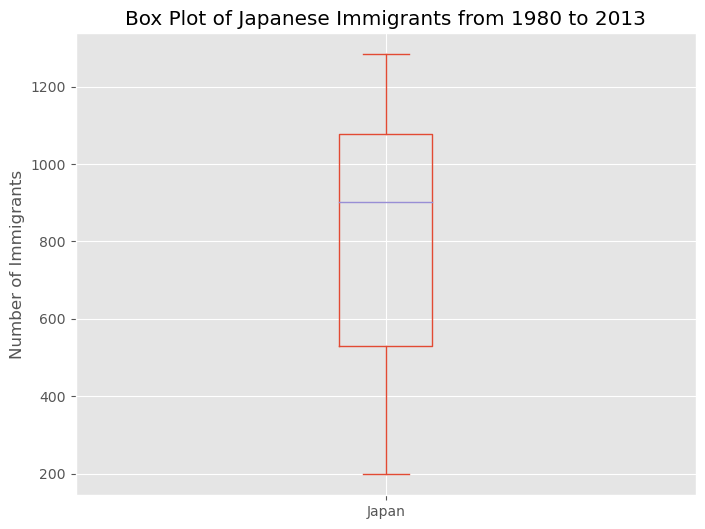

In [1286]:
# plotting 'df_japan' in a box plot
df_japan.plot(kind='box', figsize=(8,6))

plt.title('Box Plot of Japanese Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')

plt.show()

From looking at the plot above we can make a few observations:
* The minimum number of immigrants is around 200 and the maximum is around 1300 with median lying around 900.
* 25% of the years from 1980 to 2013 had an annual immigration count of ~500 or fewer
* 75% of the years from 1980 to 2013 had an annual immigration count of ~1100 or fewer

We can see the actual numbers by calling the '.describe' method as shown below.

In [1287]:
# summary of actual numbers
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Now let's compare Japan with two of the other Asian countries we looked at earlier which had very similar immigration trends to each other, India and China.

#### Immigration Distribution of China and India

In [1288]:
# creating an object from 'China' and 'India'
df_CI = df.loc[['China', 'India'], years].transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


              China         India
count     34.000000     34.000000
mean   19410.647059  20350.117647
std    13568.230790  10007.342579
min     1527.000000   4211.000000
25%     5512.750000  10637.750000
50%    19945.000000  20235.000000
75%    31568.500000  28699.500000
max    42584.000000  36210.000000


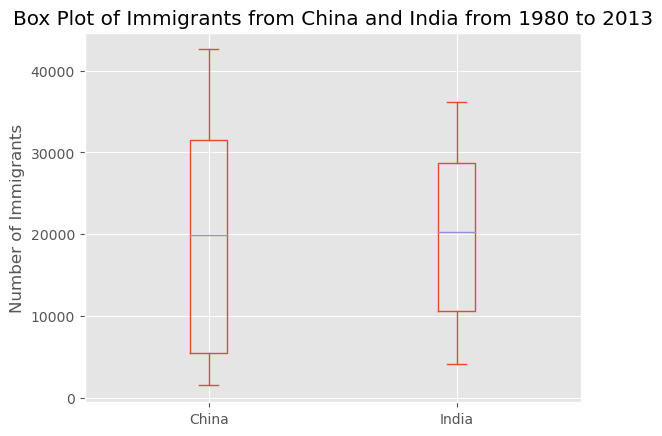

In [1289]:
# plotting the box plot for 'China' and 'India'
df_CI.plot(kind='box')
print(df_CI.describe())

plt.title('Box Plot of Immigrants from China and India from 1980 to 2013')
plt.ylabel('Number of Immigrants')

plt.show()

It would best if we had the above box plot and the earlier line plot situated next to each other to make a side-by-side comparison. We'll make a figure with subplots to achieve this.

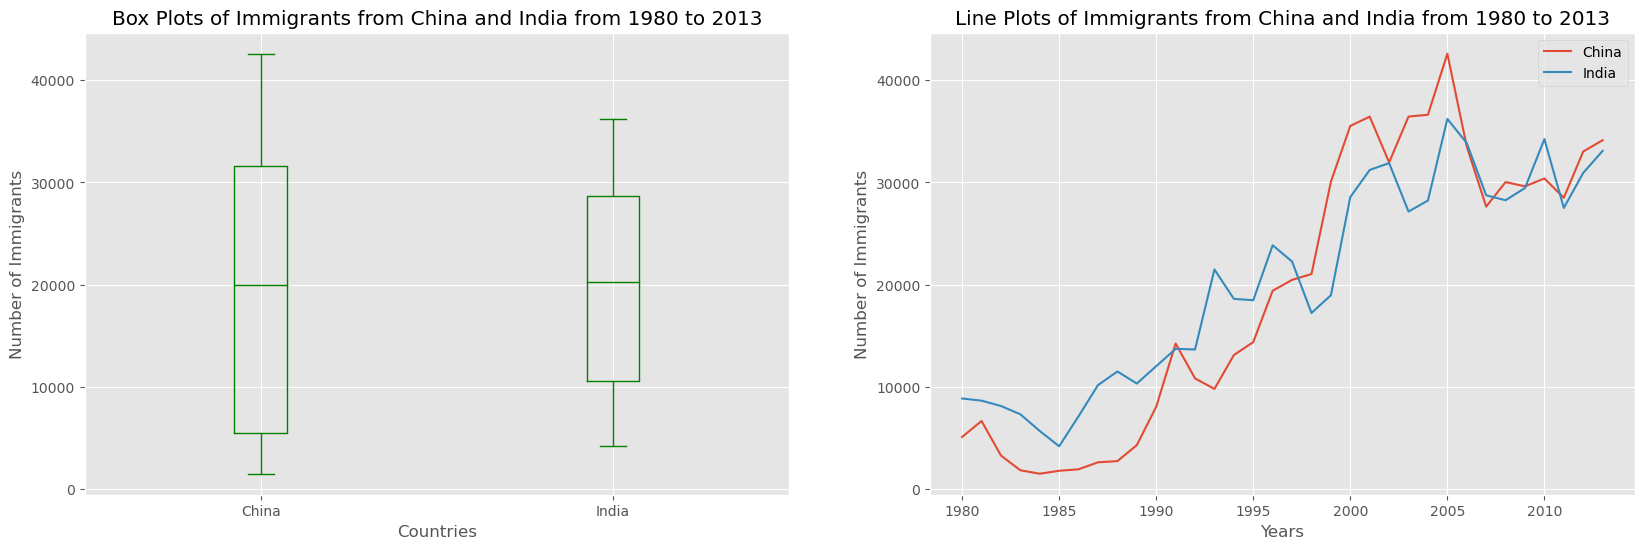

In [1290]:
# plotting
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# subplot 1
df_CI.plot(kind='box', figsize=(20,6), color='green', ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India from 1980 to 2013')
ax0.set_xlabel('Countries')
ax0.set_ylabel('Number of Immigrants')

# subplot 2
df_CI.plot(kind='line', figsize=(20,6), ax=ax1)
ax1.set_title('Line Plots of Immigrants from China and India from 1980 to 2013')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Immigrants')

plt.show()

Now let's create a box plot to visualize the distribution of the top 15 countries contributing to immigration to Canada which we touched on earlier. This time we will plot the distributions based on decades (1980s, 1990s, and 2000s).

#### Top 15 Countries Contributing to Immigration By Decade

In [1291]:
# isolating the data
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,...,1405,1263,1235,1267,1013,795,720,779,852,139241


Next we'll have to isolate the decades and then merge them together.

In [1292]:
# creating a list for each decade
years_80s = list(map(int, range(1980,1990)))
years_90s = list(map(int, range(1990,2000)))
years_00s = list(map(int, range(2000, 2010)))

df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the lists into a single dataframe
df_dec = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})

df_dec.head(10)

,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183
Poland,57602,64864,13629


In [1293]:
# summary of statistics
df_dec.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


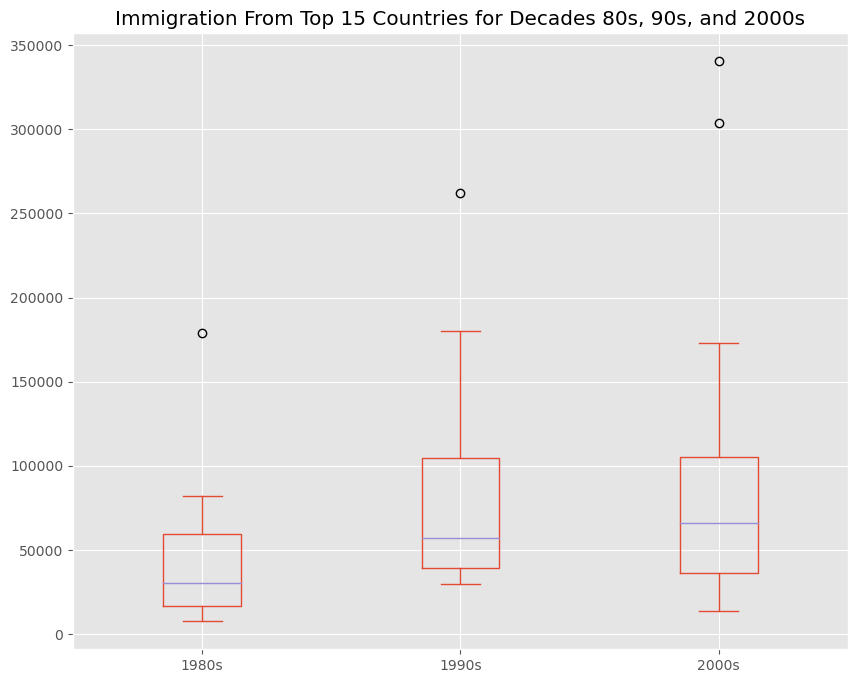

In [1294]:
# plotting the box plots for 'df_dec'
df_dec.plot(kind='box', figsize=(10,8))

plt.title('Immigration From Top 15 Countries for Decades 80s, 90s, and 2000s')

plt.show()

In the box plot above we can see that the outliers have been identified. This means that the data must be larger than Q3 by at least 1.5x the IQR or smaller than Q1 by at least 1.5x the IQR. We can check this by looking at the summary statistics again and running a few calculations.

In [1295]:
# running the summary statistics again
df_dec.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


We'll use the '2000s' decade as an example. If we subtract Q1 from Q3 we get 69,404. Next we'll see if the outlier is 1.5x larger than Q3 by running the following calculation: outlier > 105,505.5 + (1.5 * 69,404)

In [1296]:
# running the calculation for '2000s'
outlier = 105505.5 + (1.5 * 69404.0)
outlier

209611.5

In [1297]:
# next we'll look at the data where this is true to identify the outliers
df_dec = df_dec.reset_index()
df_dec[df_dec['2000s']>209611.5]

,index,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


We can see that, for the 2000s, both China and India are considered outliers since their population exceeds 209,611.5. Next we'll use scatterplots to take visualize the trend of total immigration to Canada.

#### Total Immigration to Canada

In [1298]:
# isolating the data for only total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


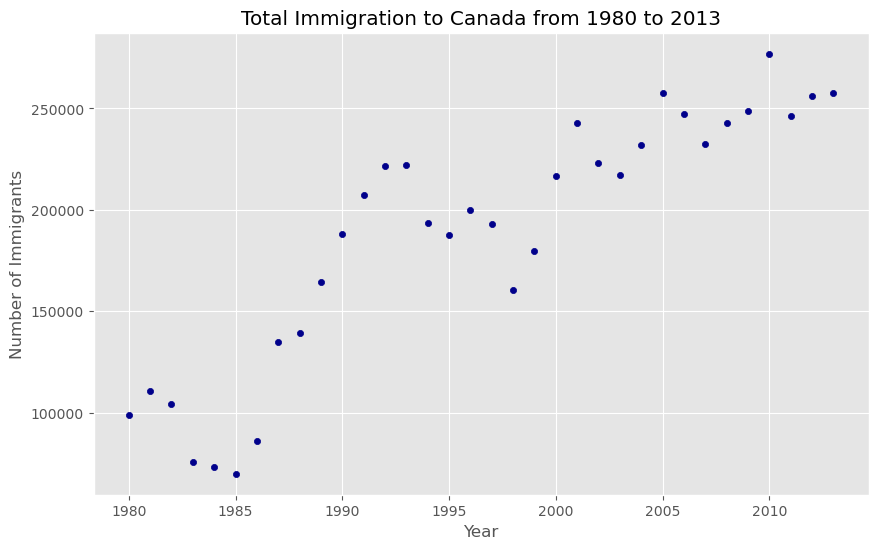

In [1299]:
# plotting the data
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

We can see from the data that, over the years, the total number of immigrants increases; a positive correlation. We can analyze this using a regression line and try to predict what the number of immigrants in 2015.

#### Predicting Immigration for 2015 Using Regression

In [1300]:
# calculating
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x,y,deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with polynomial coefficients which we will use to plot the regression line on the scatter plot.

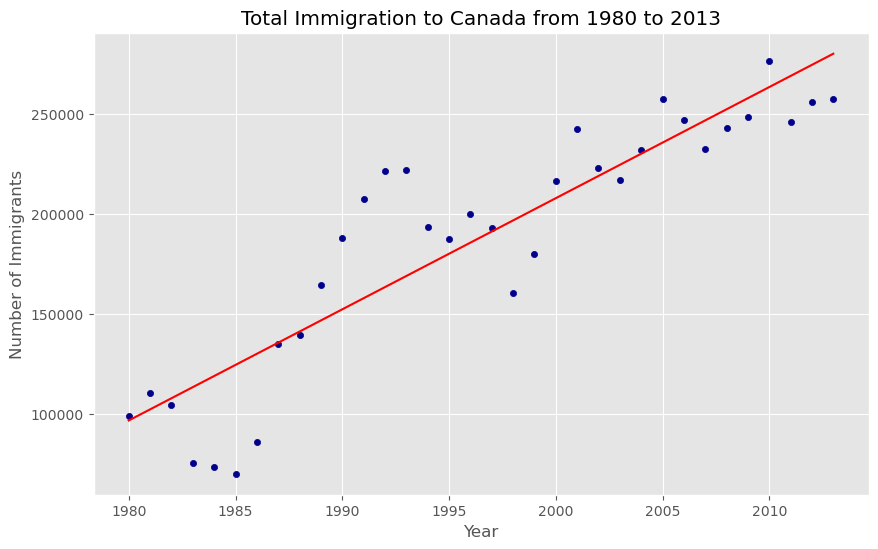

In [1301]:
# plotting the data with the line of best fit
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0]*x+fit[1], color='red')

plt.show()

Now we can predict the number of immigrants in 2015 by using the equation of line of best fit.

In [1302]:
# equation for line of best fit: number of immigrants = 5567 * year - 10926195
no_imm = 5567 * 2015 - 10926195
no_imm

291310

When compared to the Citizenship and Immigration Canada's (CIC) 2016 Annual Report, we see that Canada accepted 271,825 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number. We can also use Seaborn to create regression plots a bit quicker.

In [1303]:
# using .sum() to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

#changing the years to float
df_tot.index = map(float, df_tot.index)

# resetting the index as a column
df_tot.reset_index(inplace=True)

# renaming columns
df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


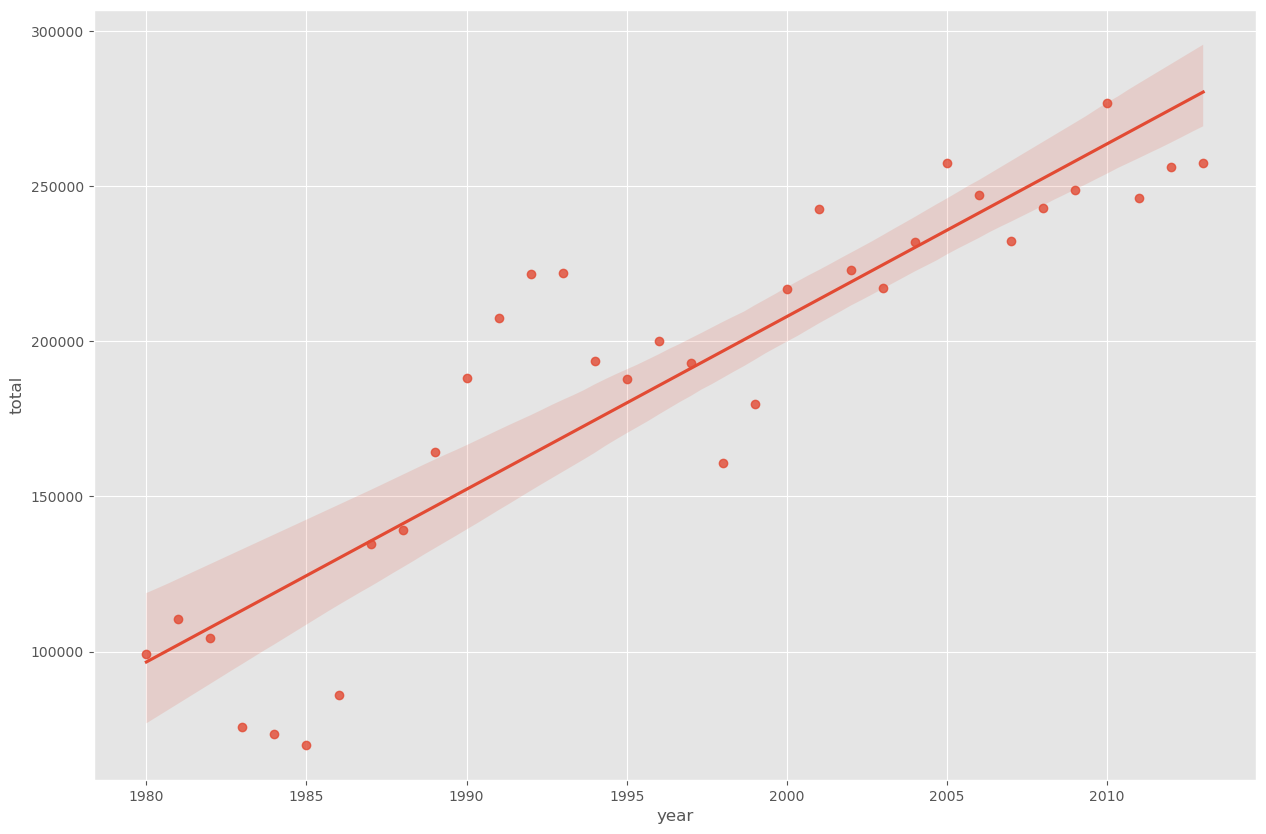

In [1304]:
# using seaborn's 'regplot' to create a regression plot
plt.figure(figsize=(15,10))
sns.regplot(x='year', y='total', data=df_tot)

plt.show()

Now we'll plot the total immigration from Denmark, Norway, and Sweden which we took a look at earlier.

#### Total Immigration from Denmark, Norway, and Sweden

In [1305]:
# isolating the data
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Now we'll create the plot.

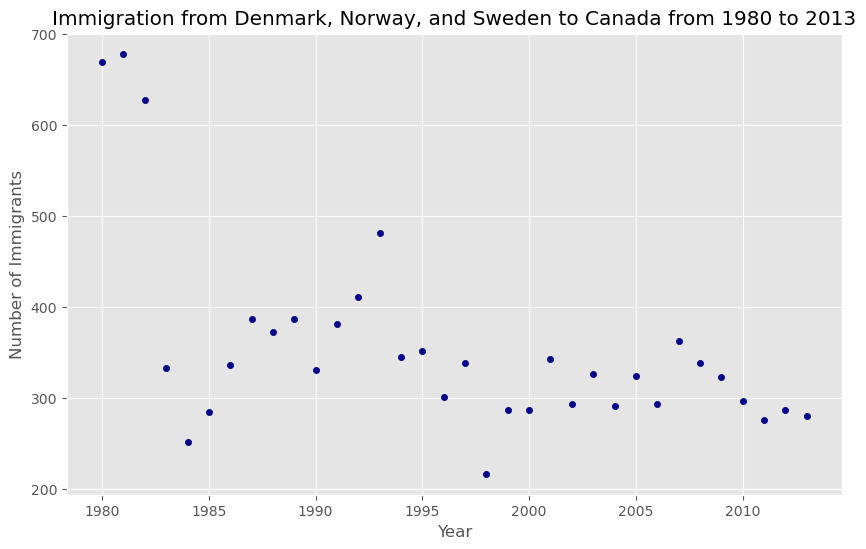

In [1306]:
# plotting the data
df_total.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Next we'll analyze the data from 1998 to 2002 during the Argentine Great Depression. The depression caused widespread unemployment, riots, government collapse, and a default on the country's foreign debt. We'll analyze its effect on immigration and compare it to its neighbor Brazil. We'll do this using a bubble plot to take into account a third dimension, z.

#### The Argentine Great Depression

In [1307]:
# transposing the dataframe
df_t = df[years].transpose()

# making sure 'years' is set to type int, labeling, and resetting the index
df_t.index = map(int, df_t.index)
df_t.index.name = 'Year'
df_t.reset_index(inplace=True)

df_t.head()

,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


Now we'll use feature scaling to normalize the data.

In [1308]:
# normalizing the data
norm_brazil = (df_t['Brazil'] - df_t['Brazil'].min()) / (df_t['Brazil'].max() - df_t['Brazil'].min())
norm_argentina = (df_t['Argentina'] - df_t['Argentina'].min()) / (df_t['Argentina'].max() - df_t['Argentina'].min())

To plot the two different scatter plots in one, we can pass one axis into the other using the 'ax' parameter. We'll also want to pass in the weights using the 's' parameter but because we normalized the data to fit in a range from 0 to 1, it won't show on the plot so we'll multiply the weights by 2000 to scale up and add 10 to compensate for the min value (or else it remains at zero and is unable to scale with * 2000).

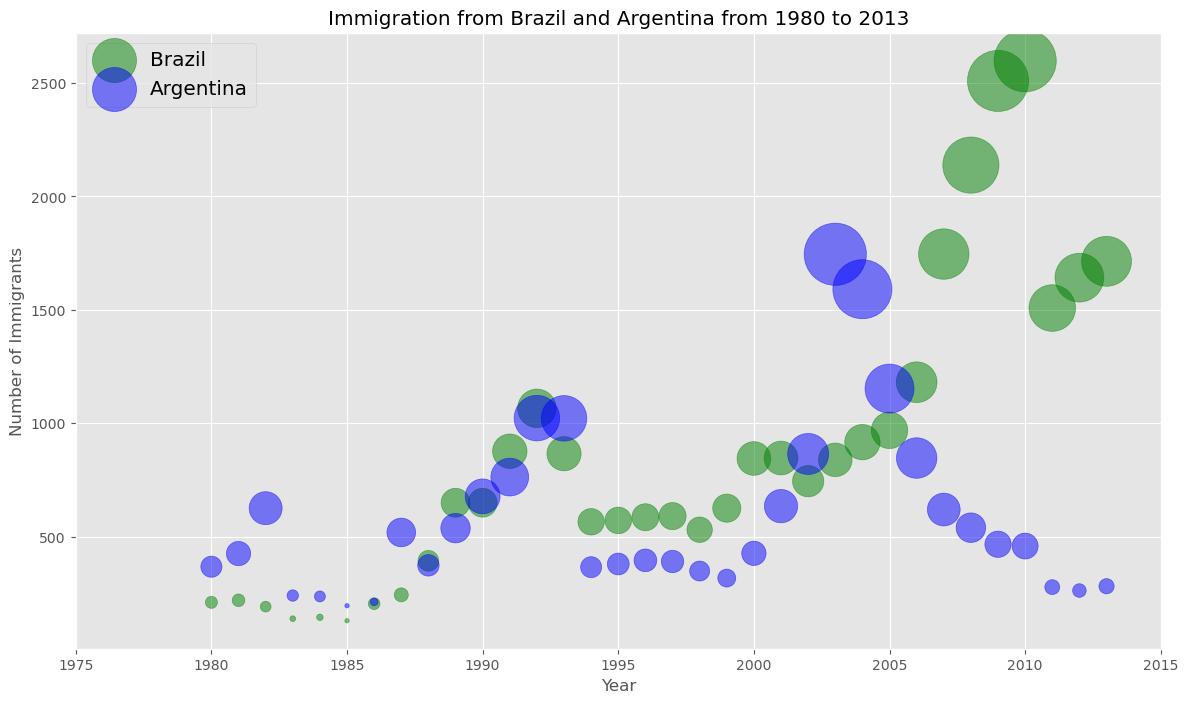

In [1309]:
# plotting the 'Brazil' data
ax0 = df_t.plot(kind='scatter',
                x='Year',
                y='Brazil',
                figsize=(14,8),
                alpha=0.5,
                color='green',
                s=norm_brazil * 2000 + 10,
                xlim=(1975,2015))

# plotting the 'Argentina' data
ax1 = df_t.plot(kind='scatter',
                x='Year',
                y='Argentina',
                alpha=0.5,
                color='blue',
                s=norm_argentina * 2000 + 10,
                ax=ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

plt.show()

The size of each bubble corresponds to the magnitude of immigrating populations for that year; the larger the bubble, the more immigrants that year. Looking at our bubble plot, we can see there was an increase in immigration from Argentina during the 1998 to 2002 great depression. There was a similar spike around 1985 to 1993 when Argentina had suffered another great depression only a few years prior. Its neighboring country, Brazil, saw a surge in immigration from the country  as the Brazilian currency fell in 1999. The immigration data reflects the government's slow recovery with a surge in 2010.

Now let's make a bubble plot using our earlier data comparing immigration from China and India to Canada. First we'll normalize the data for the two countries.

#### Comparing China and India

In [1310]:
# normalizing the data
norm_china = (df_t['China'] - df_t['China'].min()) / (df_t['China'].max() - df_t['China'].min())
norm_india = (df_t['India'] - df_t['India'].min()) / (df_t['India'].max() - df_t['India'].min())

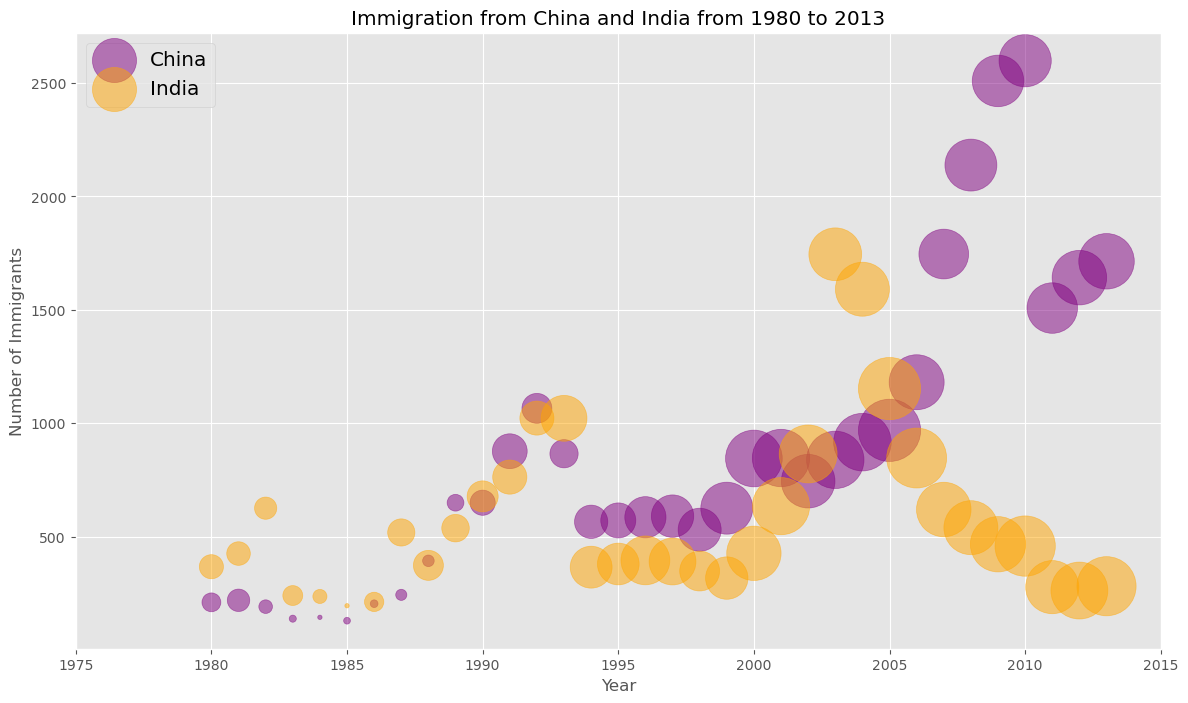

In [1311]:
# plotting the 'China' data
ax0 = df_t.plot(kind='scatter',
                x='Year',
                y='Brazil',
                figsize=(14,8),
                alpha=0.5,
                color='purple',
                s=norm_china * 2000 + 10,
                xlim=(1975,2015))

# plotting the 'India' data
ax1 = df_t.plot(kind='scatter',
                x='Year',
                y='Argentina',
                alpha=0.5,
                color='orange',
                s=norm_india * 2000 + 10,
                ax=ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

plt.show()

Next we'll use waffle charts to display progress. Let's build a waffle chart to the data about Denmark, Norway, and Sweden.

In [1312]:
# isolating the data
df_scan = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df_scan

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Next we'll calculate the proportions with respect to the 'Total' then define the size of our waffle chart.

In [1313]:
# calculating the proportions
total_values = df_scan['Total'].sum()
category_proportions = df_scan['Total'] / total_values

pd.DataFrame({'Category Proportion': category_proportions})

,Category Proportion
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [1314]:
width = 40
height = 10

total_num_tiles = width * height
print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


Now we'll use the proportion of each category to determine its respective number of tiles.

In [1315]:
# calculating the number of tiles per category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

pd.DataFrame({'Number of tiles': tiles_per_category})

,Number of tiles
Denmark,129
Norway,77
Sweden,194


We can see that Denmark will occupy 129/400 tiles, Norway will occupy 77/400 tiles, and Sweden will occupy 194/400 tiles. Now we'll make a matrix that resembles the waffle chart.

In [1316]:
# starting with an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# creating the indices
category_index = 0
tile_index = 0

# populating the waffle chart with values
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        
        waffle_chart[row, col] = category_index

In [1317]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Now we'll turn the matrix into a waffle chart.

<Figure size 640x480 with 0 Axes>

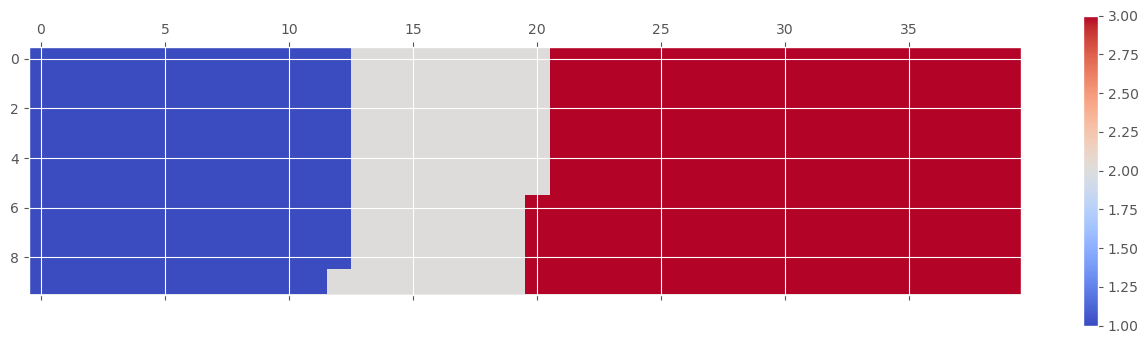

In [1318]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

plt.show()

No we'll add minor ticks, more gridlines, and a legend for better readability.

<Figure size 640x480 with 0 Axes>

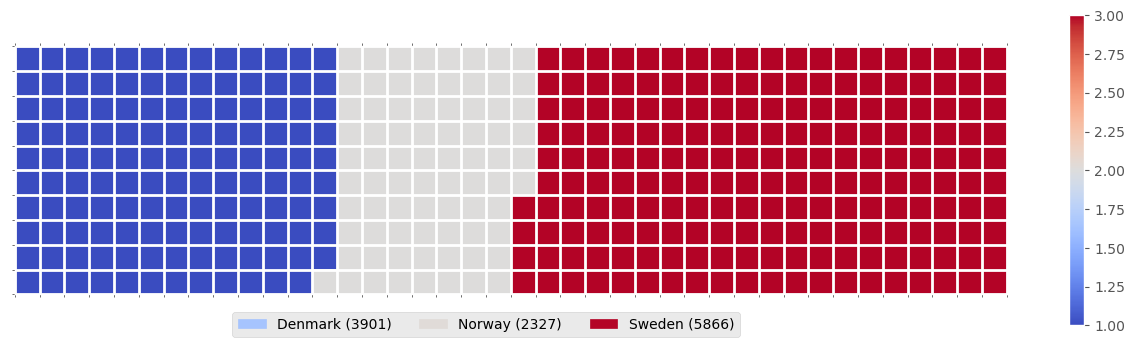

In [1319]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# current axis
ax = plt.gca()

# setting minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# adding gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# calculating the total of individual categories to match color schemes
values_cumsum = np.cumsum(df_scan['Total'])
total_values = values_cumsum[len(values_cumsum) -1]

# creating the legend
legend_handles = []
for i, category in enumerate(df_scan.index.values):
    label_str = category + ' (' + str(df_scan['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# adding legend to waffle chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_scan.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1))

plt.show()

#### Mapping Immigration to Canada
Finally we'll create a choropleth map that visualizes immigration to Canada.

In [1322]:
df.head()
df.reset_index(inplace=True)
df.head()

,level_0,index,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
2,2,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
3,3,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
4,4,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5


In [1323]:
df.drop(columns='level_0', inplace=True)
df.rename(columns={'index':'Country'}, inplace=True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
2,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
3,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
4,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5


In [1324]:
# creating a world map
world_map = folium.Map(location=[0,0], zoom_start=2)

# adding choropleth parameters
world_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada')

world_map

/opt/conda/lib/python3.7/site-packages/folium/folium.py:469: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning,


As we can see according to the legend, the darker the color of a country (closer to red), the higher the number of immigrants from that country to Canada. From one glance we can see observe that, from 1980 to 2013, the highest immigration was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the United States of America.

(end)